<a href="https://colab.research.google.com/github/rifyalt/basic_python/blob/main/7_Dataframe_Re_Shaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataframe Re-Shaping

Dalam beberapa kasus kita perlu melakukan reshaping terhadap data untuk mengubah data yang ‘tidy’ menjadi data yang lebih relevan dan lebih optimal untuk di jadikan bahan analisis.

Ada beberapa teknik reshaping data di pandas, beberapa diantaranya yang akan dijelaskan dalam artikel ini adalah Pivoting dan Melting.

### Pivoting Data

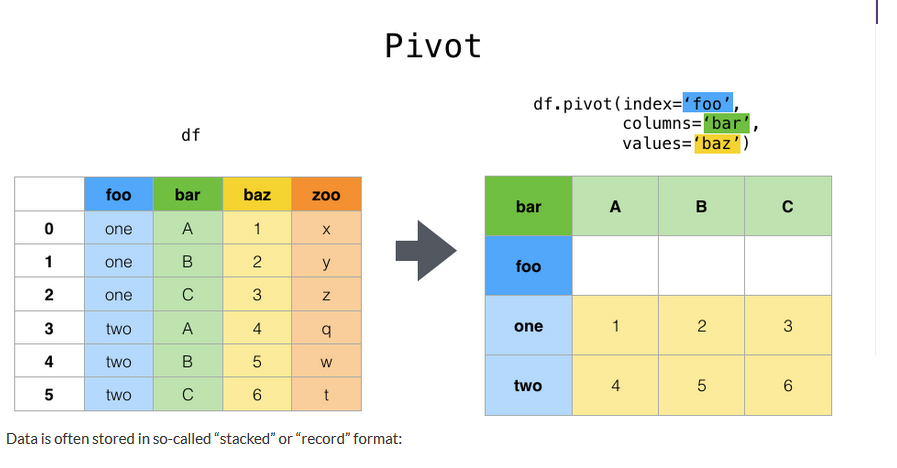

source : https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects

Pivoting adalah suatu pengubahan bentuk data dengan memutar data yang terletak di baris menjadi di column. coba perhatikan gambar di atas.

Kita juga dapat mengatakan pivoting tabel adalah melakukan perubahan pada bentuk data dari yang tadinya panjang menjadi lebar.

Ada beberapa metode untuk melakukan pivoting di pandas, yaitu pivot() dan pivot_table(), namun metode yang bagus adalah pivot_table(), oleh karena itu di artikel ini akan di tunjukan contoh melakukan perubahan bentuk data dengan metode pivot.

Untuk simplicity, kita akan menggunakan data buatan. misalkan kita mempunyai data seperti yang ada pada gambar diatas

In [ ]:
import pandas as pd
data = {
    'foo' : ['one']*3 + ['two']*3,
    'bar' : ['A', 'B', 'C', 'A', 'B', 'C'],
    'baz' : [1, 2, 3, 4, 5, 6],
    'zoo' : ['x', 'y', 'z', 'q', 'w', 't']
}
df = pd.DataFrame(data)
print(df)

   foo bar  baz zoo
0  one   A    1   x
1  one   B    2   y
2  one   C    3   z
3  two   A    4   q
4  two   B    5   w
5  two   C    6   t


kemudian kita akan melakukan pivoting tabel seperti yang ada di gambar, maka ada beberapa argument paling penting di dalam method pivot_tabel yang perlu kita perhatikan, diantaranya :

*   Values : Argumen ini mendefiniskan column mana dari dataframe yang asli yang akan di jadikan values yang ingin kita lihat di dalam hasil pivoting tabel kita.
*   Columns : Data dari column mana yang akan dijadikan column baru di dalam hasil pivoting dataframe kita.
* index : Data dari column mana yang akan dijadikan index di dalam hasil pivoting dataframe kita.

Jika kalian bingung memahami bahasa-bahasa diatas, maka kita langsung praktekan saja dan coba kalian perhatikan baik baik hasilnya.

In [ ]:
# using pivot
pivot_df = pd.pivot(df, index='foo', columns='bar', values='baz')

print(pivot_df)

bar  A  B  C
foo         
one  1  2  3
two  4  5  6


In [ ]:
#using pivot_table
pivot_table_df= pd.pivot_table(df, index='foo', columns='bar', values='baz', aggfunc='sum')

print(pivot_table_df)

bar  A  B  C
foo         
one  1  2  3
two  4  5  6


Perbedaan antara pivot dan pivot_table terletak pada penggunaan fungsi agregasi. Dalam pivot, kita tidak bisa melakukan agregasi sedangkan pada pivot_table kita bisa mengaplikasikan fungsi agregasi.


### Melting Data
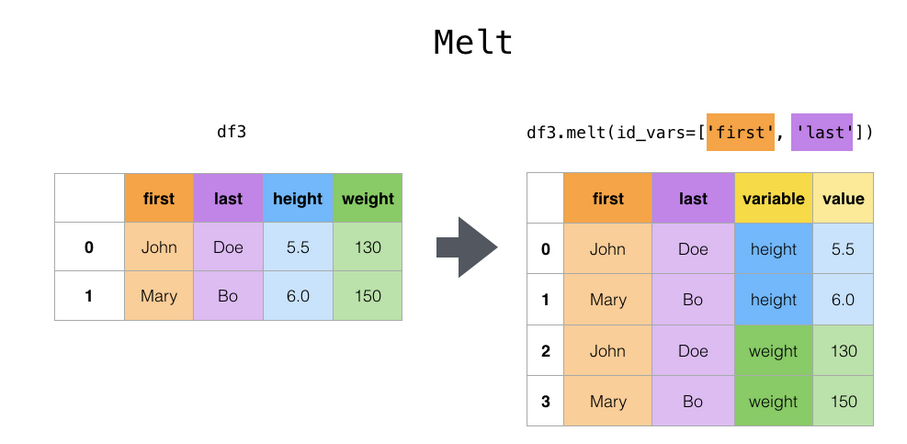

source = https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt

Melting adalah ‘unpivoting’, melting mengubah suatu data dengan memutar dari yang tadinya berada di posisi column menjadi di posisi row.

Melting mengubah data yang tadinya lebar menjadi panjang.

Melting berguna ketika ada suatu kasus dimana terdapat satu atau lebih column yang merupakan identifier variable, dan columnn lain adalah measure variabel. Identifier variabel adalah suatu entitias yang melakukan identifikasi terhadap suatu variabel yang sedang di ukur.

Apabila kita memiliki suatu besaran yang nilainya selalu berubah, kemudian kita ingin mengamati perubahan itu, berarti kita sedang memperlakukan besaran itu sebagai measure variabel. dan kita perlu sesuatu yang mereferensikan perubahan tersebut. hal itu di sebut identifier variable.

contohnya nyatanya adalah apabila kita mengamati perubahan suhu setiap waktu. maka perubahan suhu adalah variabel yang di ukur, dan waktu adalah identifier variabel.

Sekarang kita akan mencoba mempraktekan teknik melting terhadap suatu dataframe :

In [ ]:
# Membuat datafame sederhana
  
# importing pandas as pd 
import pandas as pd 
  
# membuat dataframe
df = pd.DataFrame({'Name': {0: 'John', 1: 'Bob', 2: 'Shiela'}, 
                   'Course': {0: 'Masters', 1: 'Graduate', 2: 'Graduate'}, 
                   'Age': {0: 27, 1: 23, 2: 21}}) 
df 

,Name,Course,Age
0,John,Masters,27
1,Bob,Graduate,23
2,Shiela,Graduate,21


Dalam menggunakan method melt, ada beberapa argument yang penting untuk di perhatikan, diantaranya adalah :

*   id_vars : columns mana yang akan dijadikan identifier variabel
*   value_vars : columns yang akan menjadi value setelah kita melakukan ‘unpivot’ terhadap variabel, jika tidak di definisikan maka semua column selain id_vars akan dijadikan value_vars.

In [ ]:
# Unpivot table 
pd.melt(df, id_vars =['Name'], value_vars =['Course', 'Age']) 

,Name,variable,value
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate
3,John,Age,27
4,Bob,Age,23
5,Shiela,Age,21


Materi Video:

*   [Pivot Table](https://youtu.be/AixjxKLwbi0)
*   [Melt](https://youtu.be/SsXAXbBVsYE)